### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from scipy import stats
import pickle

import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
import seaborn

### Import Dataset

In [2]:
df= pd.read_csv('train_E6oV3lV.csv')

In [3]:
pd.set_option('display.max_colwidth', None)
df.sample(30)

,id,label,tweet
22592,22593,0,week-end. â #picoftheday #girl #girly #longhair #brownhair #browneyes faceâ¦
20049,20050,0,let the sunshine... ð§âï¸ #sunlight #sun #goodmood #grillon #zen
20504,20505,0,sad attempt to gain recognition from the joe ie brigade #coybig #irl #ireland
18664,18665,0,toasty 4-miler in the midwest yesterday! #running #runner #run #healthy #fitness #health #hot #beastmode #go
28352,28353,1,"verified: shocking video of #myanmar police touring #rohingya civilians was shot at #koetankauk on nov 5, 2016.â¦"
9824,9825,0,looking forward @user to a podium finish @user this year. what's your view? #gogogo
27363,27364,0,@user #honestyhour i always break my back to see if ppl straight but it's never vise versa !
25110,25111,0,61716~ super blessed day! #tyl #bikelife #tired #wohâ¦
5278,5279,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
15211,15212,0,(standard american diet) is really sad! facing the truth is even sadder...


In [4]:
df.index=df["id"]
df.drop('id', axis=1, inplace=True)
df.sample(5)

,label,tweet
id,,
18697,0,the saddest image ever to have existed. #outoforder #icecream ness #sosad #sososadâ¦
5660,0,@user that's probably that shizz you used to say to kelvin
30958,1,@user #feminismiscancer #feminismisterrorism #feminismmuktbharat why #malevote is ignored @user
29365,0,smiles are contagious. smile at someone and see if they reciprocate.
8258,0,turkey 0-1 croatia: happy volley for modric: luka modric struck an unbelievable volley to earn croatia...


### Data Analysis

In [5]:
print(f'Number of Observations: {df.shape[0]}')
print(f'Number of Features: {df.shape[1]}')

Number of Observations: 31962
Number of Features: 2


In [6]:
#  Check the Missing Value
df.isnull().sum()

label    0
tweet    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31962 entries, 1 to 31962
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   31962 non-null  int64 
 1   tweet   31962 non-null  object
dtypes: int64(1), object(1)
memory usage: 749.1+ KB


In [8]:
# Extracting the Target Attribute for Each Class and Visualize
hate_speech = df[df['label'] == 1].shape[0]
free_speech = df[df['label'] == 0].shape[0]
print('Hate Speech =', hate_speech)
print('Free Speech =', free_speech)

Hate Speech = 2242
Free Speech = 29720


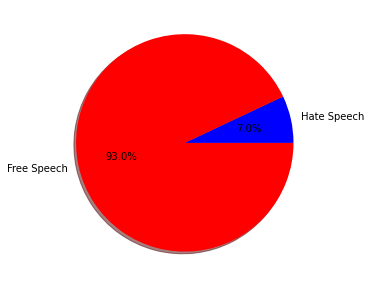

In [9]:
# Visualize the Label Class
speech = [hate_speech, free_speech]
label = ["Hate Speech", "Free Speech"]

plt.figure(figsize=(5, 5))
plt.pie(speech, labels = label, shadow = True, autopct = '%1.1f%%', colors=['blue', 'red'])
plt.style.use('fivethirtyeight')
plt.show()

### Add features

In [10]:
# Number of characters in the text
df['tweet_length'] = df['tweet'].apply(len)

# Number of words in the text
df['tweet_num_words'] = df['tweet'].apply(lambda x: len(x.split()))

# Average length of the words in the text
df["mean_word_len"] = df["tweet"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# Number of non-stopwords in the text: first we will extend the stopwords to include other words used in twitter
# such as retweet(rt) etc.

# nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words("english")
other_exclusions = ["#ff", "ff", "rt"]
stopwords.extend(other_exclusions)
df['tweet_non_stopwords'] = df['tweet'].apply(lambda x: len([t for t in x.split() if t not in stopwords]))
df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,31962.0,0.070146,0.255397,0.0,0.000000,0.0,0.0,1.000000
tweet_length,31962.0,84.739628,29.455749,11.0,63.000000,88.0,108.0,274.000000
tweet_num_words,31962.0,13.158720,5.478150,3.0,9.000000,13.0,17.0,34.000000
mean_word_len,31962.0,5.593463,1.945719,1.0,4.529412,5.2,6.2,81.333333
tweet_non_stopwords,31962.0,9.121144,3.474333,0.0,7.000000,9.0,11.0,27.000000


In [11]:
df.head()


,label,tweet,tweet_length,tweet_num_words,mean_word_len,tweet_non_stopwords
id,,,,,,
1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,102,18,4.555556,8
2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,122,19,5.315789,14
3,0,bihday your majesty,21,3,5.666667,2
4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,86,14,4.928571,9
5,0,factsguide: society now #motivation,39,4,8.000000,3


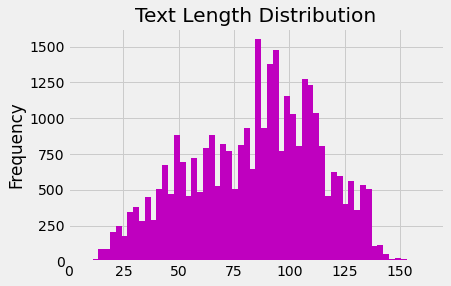

In [12]:
df["tweet_length"].plot(kind='hist', title='Text Length Distribution', xlim=[0, 170], bins = 100, figsize=(6,4),color='m')
plt.show()

**Note** : Distribution of text-length is between 5 and 150 where the most tweets-length are around 90 characters. It is also noticable that the number of tweets seem to be skewed.

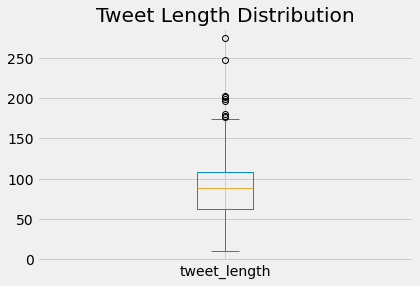

In [13]:
df["tweet_length"].plot(kind='box', title='Tweet Length Distribution', figsize=(6,4))
plt.show()

## Data Preprocessing

#### 1. Text Cleaning
- Lowercase
- Remove Punctuation
- Remove Urls
- Removing @tags
- Remove Special Characters

#### 2. Preprocessing Operations
- Tokenizing
- Removing Stop Words
- Lemmatization
- WordCloud

In [16]:
def clean_txt(tweet):
    
    # removal of extra spaces
    regex_pat = re.compile(r'\s+')
    Tweet = re.sub(regex_pat," ",tweet)
    
    #Remove @tags
    Tweet= re.sub(r'@[\w\-]+',"",Tweet)
    
    # removal of links[https://abc.com]
    url_regex =  re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
            '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    Tweet = re.sub(url_regex,"",Tweet)
    
    # split into words (tokenizing)
    Tweet = nltk.word_tokenize(Tweet)
    
    # convert to lower case
    Tweet = [w.lower() for w in Tweet]    
    
    # remove punctuation from each word
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    Tweet = [re_punc.sub('', w) for w in Tweet]

    # remove remaining tokens that are not alphabetic
    Tweet = [word for word in Tweet if word.isalpha()]

    # filter out stop words
    Tweet = [w for w in Tweet if w not in  stopwords] 
    
    # filter out short tokens
    Tweet = [word for word in Tweet if len(word) > 2]

    #Stemm all the words in the sentence
    lemmatizer = WordNetLemmatizer() 
    lem_words = [lemmatizer.lemmatize(word) for word in Tweet]
    combined_text = ' '.join(lem_words)
    return combined_text

# Cleaning the text data
df['cleaned_phrase'] = df['tweet'].apply(clean_txt)
df.sample(10)

,label,tweet,tweet_length,tweet_num_words,mean_word_len,tweet_non_stopwords,cleaned_phrase
id,,,,,,,
20601,0,i am famous. #i_am #positive #affirmation,46,6,6.000000,4,famous iam positive affirmation
6110,0,@user yepp #depression #anxiety #anorexia #quotes #secret_society123 #grunge #girl #suicide #l4l #smile escapinqlifee,121,13,8.076923,13,yepp depression anxiety anorexia quote grunge girl suicide smile escapinqlifee
2348,0,"@user #pathetic attitude #orlandoshooting we need to ""get used to the idea"" brandon smith from #alt-market. such a sma young guy",130,21,5.142857,14,pathetic attitude orlandoshooting need get used idea brandon smith altmarket sma young guy
9096,0,#food @user #hipstergirl is and #loves #food #thisiswhyiwonteverbeskinnyâ¦,78,8,8.500000,6,food hipstergirl love food
1099,0,watching live tonight. boy george and the culture club. #memories .,69,11,5.181818,9,watching live tonight boy george culture club memory
17225,0,the day has come! #coldplay #aheadfullofdreams #ahfodtour #coldplaywembley #cantwait ð¤,92,10,8.000000,8,day come coldplay aheadfullofdreams ahfodtour coldplaywembley cantwait
25771,0,happy flag day! #flag #day #holiday #america #murca #patriotic #redwhiteblue,80,10,6.700000,10,happy flag day flag day holiday america murca patriotic redwhiteblue
30719,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,86,14,4.928571,9,model love take time
197,0,#nohcarolina bull up: you will dominate your bull and you will direct it whatever you want it to do. whe,107,20,4.250000,10,nohcarolina bull dominate bull direct whatever want whe


### Visualizations

Visualizing which of the word is most commonly used in the twitter dataset

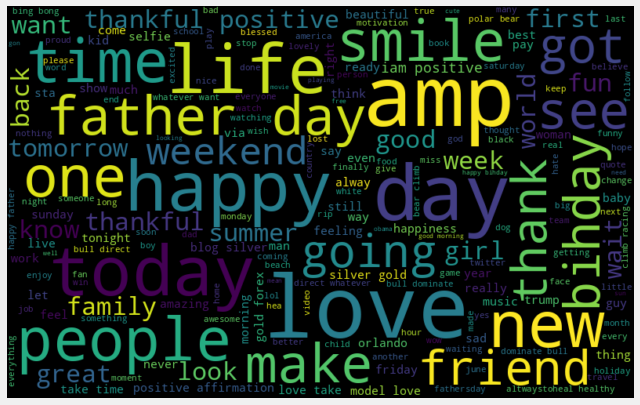

In [17]:
# imshow-Display data as an image
# interpolation - https://matplotlib.org/3.2.1/gallery/images_contours_and_fields/interpolation_methods.html
all_words = ' '.join([text for text in df['cleaned_phrase'] ])

wordcloud = WordCloud(width=800, 
                      height=500, 
                      random_state=21, 
                      max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Visualizing which of the word is most commonly used for hate speech

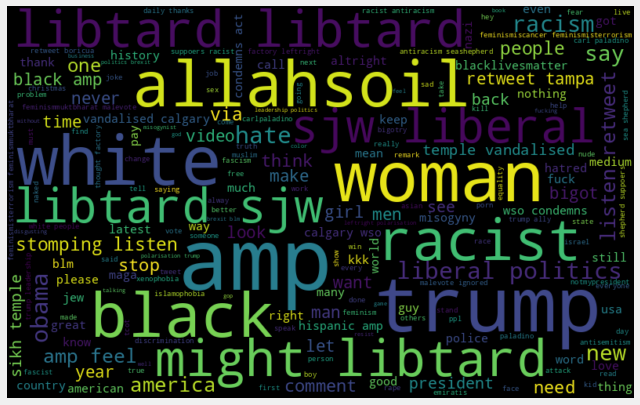

In [19]:
hate_words = ' '.join([text for text in df['cleaned_phrase'][df['label'] == 1]])
wordcloud = WordCloud(width=800, 
                      height=500,
                      random_state=21, 
                      max_font_size=110).generate(hate_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Visualizing which of the word is most commonly used for free speech

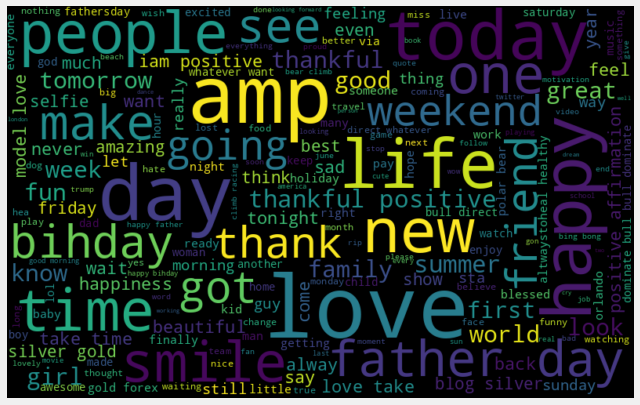

In [20]:
free_words = ' '.join([text for text in df['cleaned_phrase'][df['label'] == 0]])
wordcloud = WordCloud(width=800, 
                      height=500,
                      random_state=21, 
                      max_font_size=110).generate(free_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()